<font size="+3"><strong>Prediction Using Unsupervised Algorithms</strong></font>

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm
import seaborn as sns

# Model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Evaluation
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

# **1. Prepare**

## **1.1. Import**

In [ ]:
df = pd.read_excel('/content/Iris.xlsx')
print(df.shape)
print(df.info())
df.head()

(150, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## **1.2. Explore**

In [ ]:
df.drop(columns="Id", inplace=True)

In [ ]:
# Class Balance
df["Species"].value_counts(normalize=True)

Species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

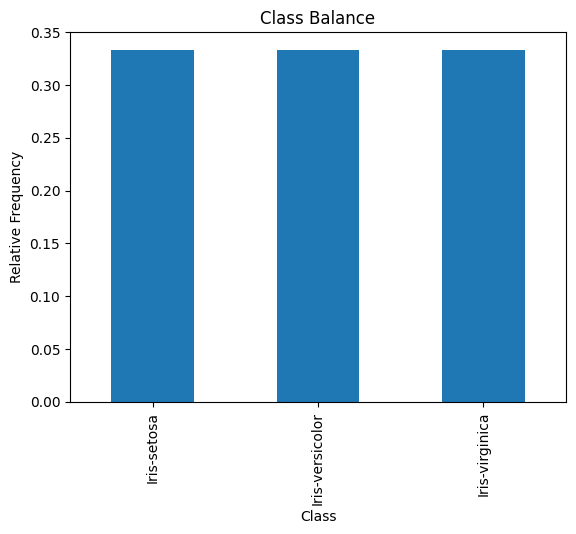

In [ ]:
# Class Balance plot
df["Species"].value_counts(normalize=True).plot(
        kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

In [ ]:
# Numerical statistics
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Data visualizations**

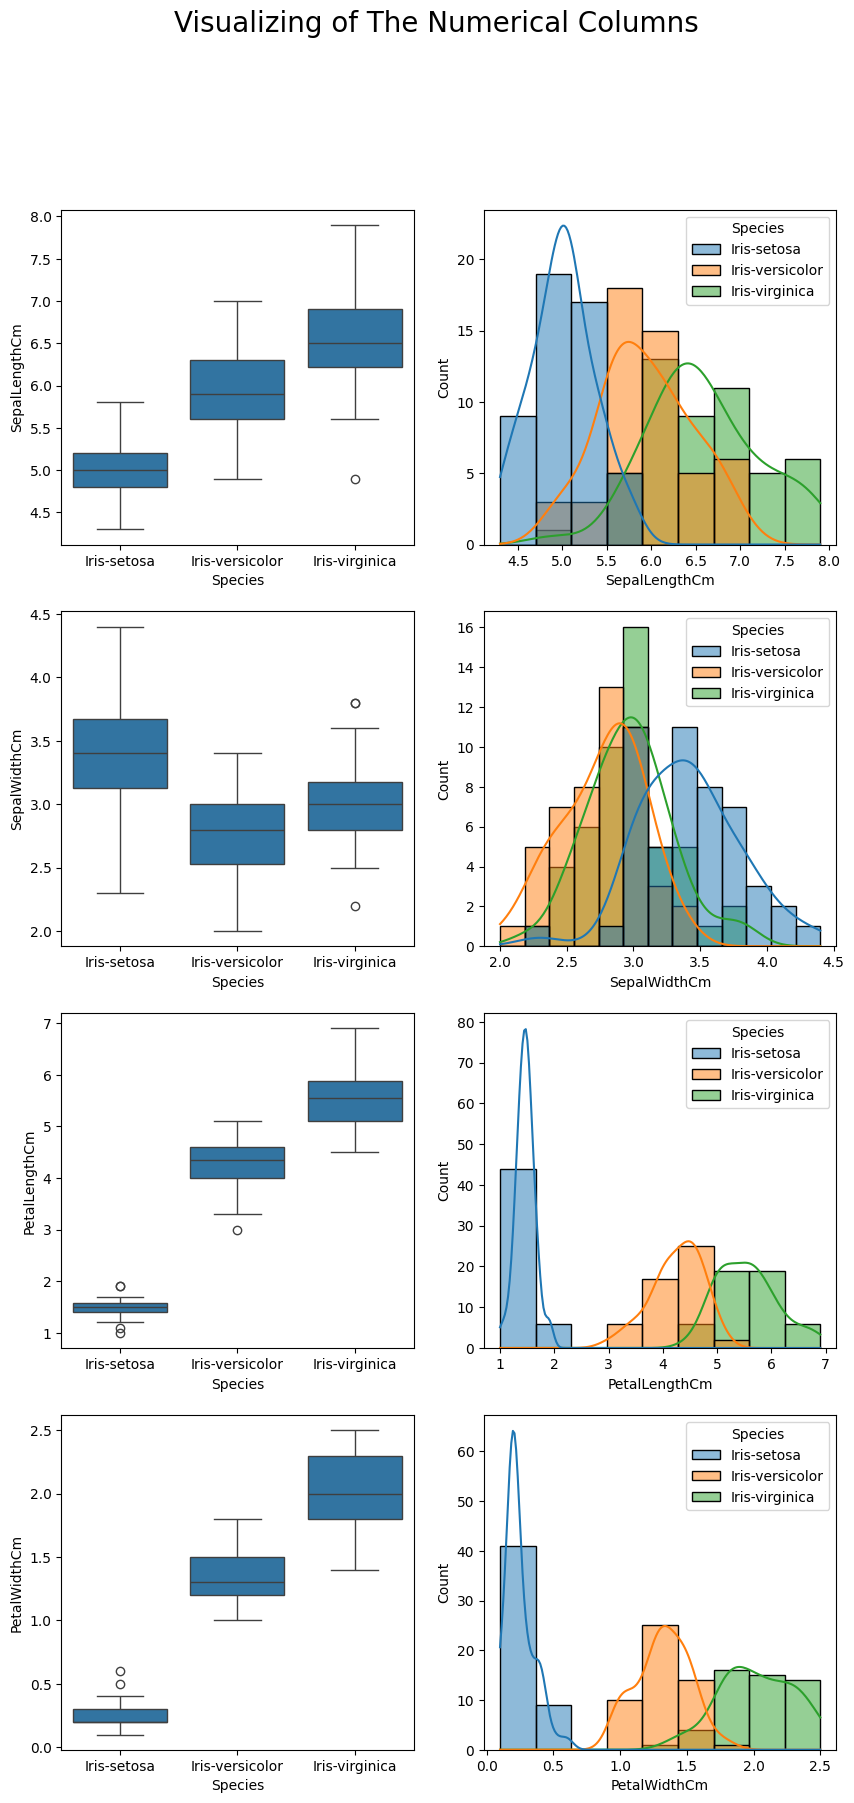

In [ ]:
fig,ax=plt.subplots(4,2,figsize=(10,20))
# Iterate over numerical columns
for index,i in enumerate(df.select_dtypes(include='number').columns):
    plt.suptitle("Visualizing of The Numerical Columns",size=20)
    sns.boxplot(x = "Species", y = i, data = df, ax=ax[index,0])
    sns.histplot(data = df, x = i, kde = True, hue = "Species", ax=ax[index,1])

The `sepal_length` feature has a normal distribution, with the setosa flowers having the lowest `sepal_length`, the versicolor flowers having a medium `sepal_length`, and the virginica flowers having the highest `sepal_length`.

Similarly, the `sepal_width` feature also has a normal distribution. Although there are differences in `sepal_width` distributions among the three species, these differences are not as extreme as for other features.

On the other hand, the `petal_length` feature has a pseudonormal distribution, with the setosa flowers having the lowest `petal_length`, the versicolor flowers having a medium `petal_length`, and the virginica flowers having the highest `petal_length`.

Finally, the `petal_width` feature also has a pseudonormal distribution, with the setosa flowers having the lowest `petal_width`, the virginica flowers having the highest `petal_width`, and the versicolor flowers having a medium `petal_width`. The `petal_width` feature values show significant differences depending on the species.

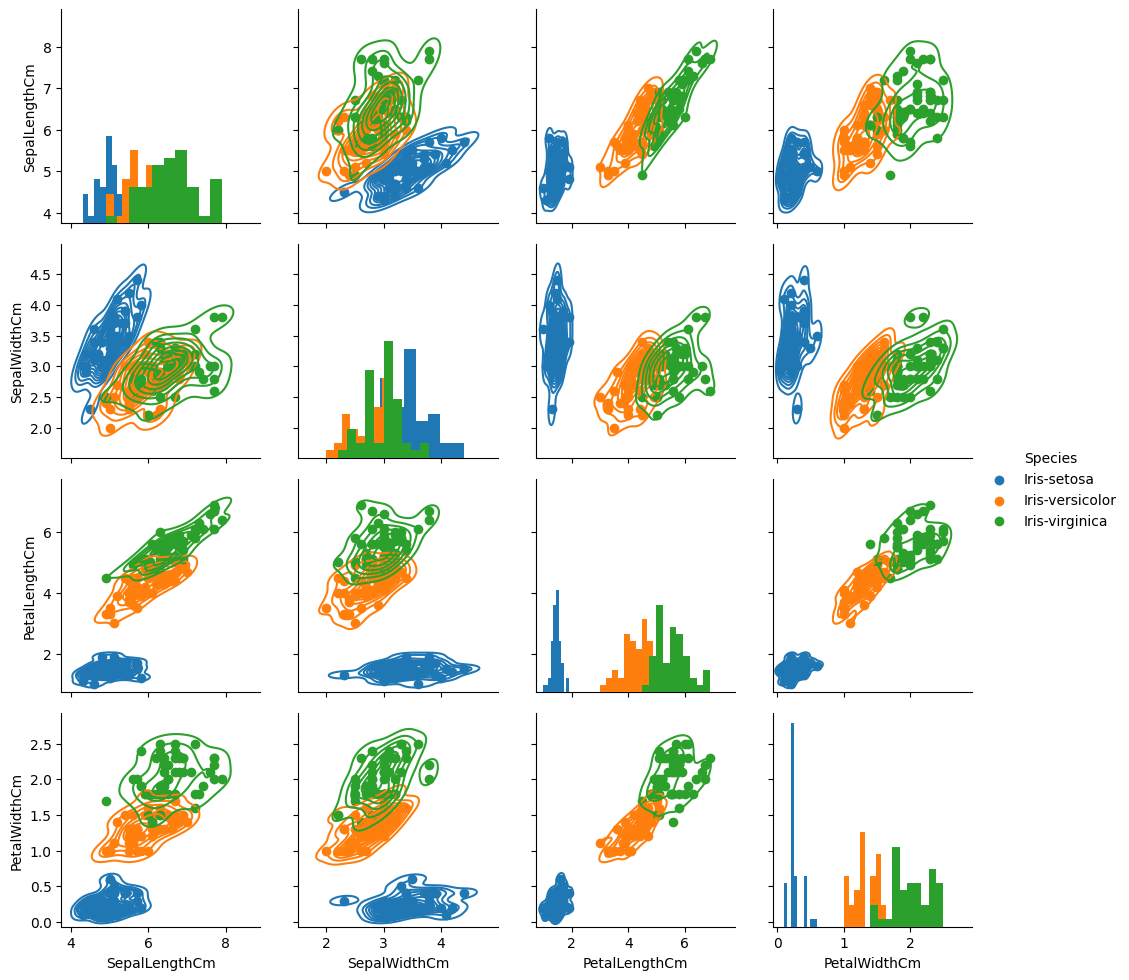

In [ ]:
fig = sns.PairGrid(df, hue="Species")

# type of graph for non-diagonal
fig = fig.map_diag(plt.hist)
fig = fig.map_offdiag(plt.scatter)
fig = fig.map_offdiag(sns.kdeplot)

# to add legends
fig = fig.add_legend()

# to show
plt.show();

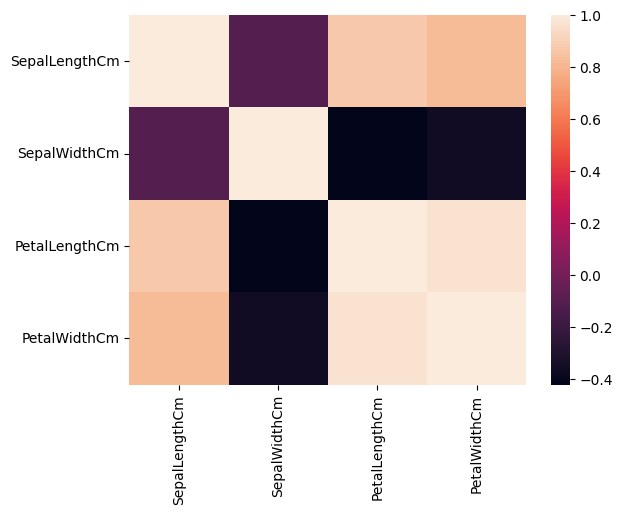

In [ ]:
corr = df.drop(columns="Species").corr()
# Plot heatmap of `correlation`
sns.heatmap(corr);

## **1.3. Split**

In [ ]:
X = df.drop(columns="Species")
print(X.shape)
X.head()

(150, 4)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **2. Build Model**

## **2.1. Iterate**

In [ ]:
"""
   Use a for loop to build and train a K-Means model where n_clusters ranges from 2 to 12 (inclusive).
   Each time a model is trained, calculate the inertia and add it to the list inertia_errors, then calculate the silhouette score and add it to the list silhouette_scores.
"""

n_clusters = range(2,13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    #build model
    model = KMeans(n_clusters=k , random_state=42, n_init=10)
    #train model
    model.fit(X)
    #inertia
    inertia_errors.append(model.inertia_)
    #silhouette
    silhouette_scores.append(silhouette_score(X,model.labels_))

print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

Inertia: [152.36870647733906, 78.940841426146, 57.317873214285704, 46.53558205128205, 38.930963049671746, 34.598978434287126, 30.085307692307694, 28.06327473272553, 26.587316820410805, 24.63877272727273, 22.835628405907816]

Silhouette Scores: [0.6808136202936816, 0.5525919445499757, 0.4978256901095472, 0.4885175508886279, 0.36820569682713084, 0.3576975600180635, 0.35912838676456094, 0.3423796791000656, 0.31659552132968305, 0.32157888736149903, 0.30238510807586494]


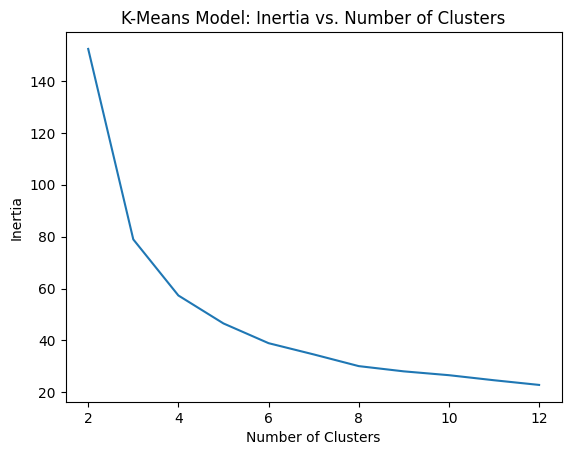

In [ ]:
# Plot `inertia_errors` by `n_clusters`
plt.plot(n_clusters, inertia_errors)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("K-Means Model: Inertia vs. Number of Clusters");

We can see that the line starts to flatten out around 3 or 4 clusters.

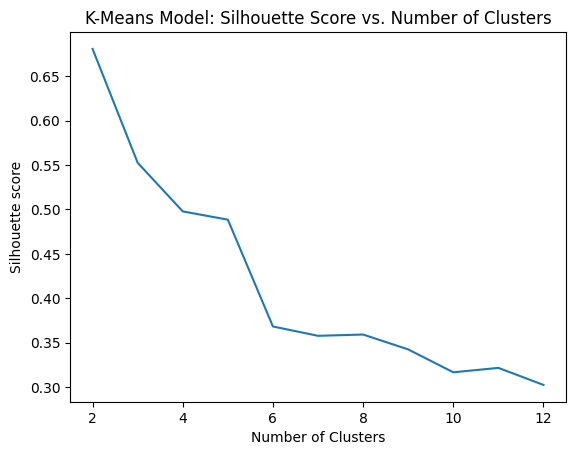

In [ ]:
# Plot `silhouette_scores` vs `n_clusters`
plt.plot(n_clusters, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette score")
plt.title("K-Means Model: Silhouette Score vs. Number of Clusters");

This one's a little less straightforward, but we can see that the best silhouette scores occur when there is 3 clusters.

Putting the information from this plot together with our inertia plot, it seems like the best setting for `n_clusters` will be 3.

In [ ]:
model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=3, random_state=42, n_init=10)
)
model.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, n_init=10, random_state=42))])

# **3. Results**

In [ ]:
# Extract labels

labels = model.named_steps["kmeans"].labels_
print(labels[:5])

[1 1 1 1 1]


In [ ]:
# Create a DataFrame xgb that contains the mean values of the features in X for each of the clusters
xgb = X.groupby(labels).mean()
xgb

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,6.780851,3.095745,5.510638,1.972340
1,5.006000,3.418000,1.464000,0.244000
2,5.801887,2.673585,4.369811,1.413208


In [ ]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode="group",
    title="Iris Flowers by Cluster"
)
fig.update_layout(xaxis_title="Cluster", yaxis_title="Value [cm]")
fig.show()

In [ ]:
# Create a PCA transformer, use it to reduce the dimensionality of the data in X to 2, and then put the transformed data into a DataFrame named X_pca

# Instantiate transformer
pca = PCA(n_components=2, random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns= ["PC1","PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (150, 2)


,PC1,PC2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [ ]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
    data_frame=X_pca,
    x= "PC1",
    y="PC2",
    color=labels.astype(str),
    title= "PCA Representation of Clusters"
)
fig.update_layout(xaxis_title="PC1", yaxis_title="PC2")

fig.show()